# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [1]:
# (1) Create a `Blobs` dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate the blobs dataset
X, y = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8, random_state=1)

# Check the shape of X and y
print(X.shape, y.shape)


(1200, 8) (1200,)


❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

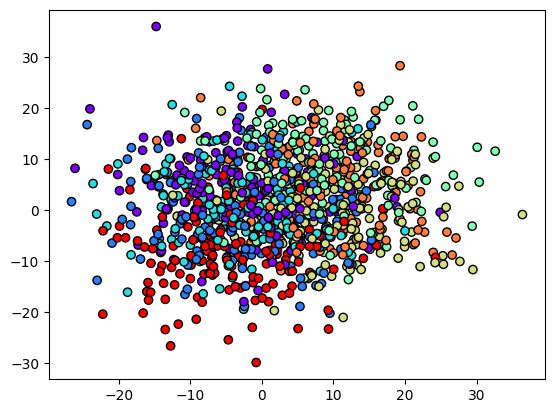

In [2]:
# Plot a scatterplot of two arbitrary dimensions
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k')
plt.show()


❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

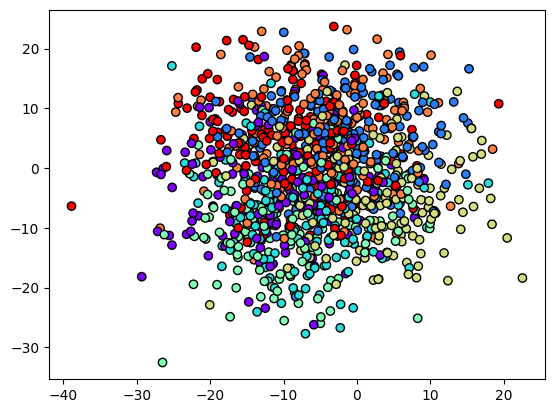

In [3]:
# Repeat the operation on other dimensions (for example, dimensions 2 and 3)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='rainbow', edgecolor='k')
plt.show()


## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [4]:
# (2) Encoding the target of a multi-class classification problem
from tensorflow.keras.utils import to_categorical

# Print y before encoding
print(y)

# Encode y to categorical
y_cat = to_categorical(y)

# Print the shape to verify the encoding
print(y_cat.shape)


2024-10-01 09:40:43.876799: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 09:40:43.994689: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


[2 2 5 ... 1 3 0]
(1200, 7)


## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [5]:
# (3) Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=1)


In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [6]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [7]:
# Initialize a model with the correct architecture for multiclass classification
from tensorflow.keras import models, layers

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=8))  # First layer with 50 neurons
    model.add(layers.Dense(7, activation='softmax'))  # Output layer with 7 neurons for 7 categories
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = initialize_model()


2024-10-01 09:41:17.540866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


❓  How many parameters (a.k.a. weights) are there in the model ❓

In [8]:
# Check the number of parameters in the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [9]:
# Fit the model on the train data for 50 epochs
history = model.fit(X_train, y_train, epochs=50, verbose=1)


Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 1.9123 - accuracy: 0.2369
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 1.6939 - accuracy: 0.3917
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 1.5164 - accuracy: 0.5071
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 1.3666 - accuracy: 0.5762
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 1.2407 - accuracy: 0.6250
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 1.1367 - accuracy: 0.6571
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 1.0527 - accuracy: 0.6762
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9860 - accuracy: 0.6798
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.9333 - accuracy: 0.6940
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.8928 - accuracy: 0.6940
Epoch 11/50
27/27 [

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [10]:
# Evaluate the model on the test set and print accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")


12/12 [==============================] - 0s 2ms/step - loss: 0.9590 - accuracy: 0.6806
Test accuracy: 0.6805555820465088


❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

(No need to code for this, just think about how our dataset was created in the first place.)

In [11]:
# Determine the baseline accuracy (random guess would give an accuracy of about 1/7 = 0.14)
accuracy_baseline = 1/7
print(f"Baseline accuracy: {accuracy_baseline}")


Baseline accuracy: 0.14285714285714285


🧪 **Test your code**

In [12]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/amralghasham/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/amralghasham/code/Amralghasham/data-multiclass-classification/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

Epoch 1/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.9701 - accuracy: 0.1440
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.7365 - accuracy: 0.3167
Epoch 3/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.5527 - accuracy: 0.4869
Epoch 4/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.3959 - accuracy: 0.5881
Epoch 5/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.2634 - accuracy: 0.6250
Epoch 6/1000
27/27 [==============================] - 0s 2ms/step - loss: 1.1557 - accuracy: 0.6512
Epoch 7/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.0665 - accuracy: 0.6702
Epoch 8/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.9948 - accuracy: 0.6833
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.9400 - accuracy: 0.6917
Epoch 10/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.8972 - accuracy: 0.6964

Epoch 82/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.7714
Epoch 83/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6261 - accuracy: 0.7690
Epoch 84/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.7655
Epoch 85/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6239 - accuracy: 0.7667
Epoch 86/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6230 - accuracy: 0.7679
Epoch 87/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.7714
Epoch 88/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.7690
Epoch 89/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.7667
Epoch 90/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.7702
Epoch 91/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6183 - accurac

27/27 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.7905
Epoch 162/1000
27/27 [==============================] - 0s 979us/step - loss: 0.5585 - accuracy: 0.7893
Epoch 163/1000
27/27 [==============================] - 0s 976us/step - loss: 0.5577 - accuracy: 0.7952
Epoch 164/1000
27/27 [==============================] - 0s 970us/step - loss: 0.5583 - accuracy: 0.7869
Epoch 165/1000
27/27 [==============================] - 0s 988us/step - loss: 0.5572 - accuracy: 0.7917
Epoch 166/1000
27/27 [==============================] - 0s 996us/step - loss: 0.5580 - accuracy: 0.7905
Epoch 167/1000
27/27 [==============================] - 0s 988us/step - loss: 0.5563 - accuracy: 0.7940
Epoch 168/1000
27/27 [==============================] - 0s 995us/step - loss: 0.5556 - accuracy: 0.7952
Epoch 169/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7917
Epoch 170/1000
27/27 [==============================] - 0s 968us/step - loss: 0.555

Epoch 241/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.8119
Epoch 242/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.8131
Epoch 243/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.8060
Epoch 244/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.8083
Epoch 245/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.8095
Epoch 246/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.8095
Epoch 247/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.8083
Epoch 248/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.8095
Epoch 249/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.8131
Epoch 250/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5144

27/27 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.8226
Epoch 322/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.8226
Epoch 323/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.8238
Epoch 324/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.8202
Epoch 325/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.8274
Epoch 326/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.8274
Epoch 327/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.8333
Epoch 328/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.8274
Epoch 329/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.8286
Epoch 330/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.8333
Epoch 402/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8333
Epoch 403/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8357
Epoch 404/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8405
Epoch 405/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8345
Epoch 406/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8357
Epoch 407/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8381
Epoch 408/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8405
Epoch 409/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8440
Epoch 410/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8452
Epoch 482/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8548
Epoch 483/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8536
Epoch 484/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8417
Epoch 485/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8512
Epoch 486/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8512
Epoch 487/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8595
Epoch 488/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8512
Epoch 489/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8488
Epoch 490/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8643
Epoch 562/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8643
Epoch 563/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8655
Epoch 564/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8714
Epoch 565/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8679
Epoch 566/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8690
Epoch 567/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8667
Epoch 568/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8690
Epoch 569/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8667
Epoch 570/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8702
Epoch 642/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8726
Epoch 643/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8690
Epoch 644/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8762
Epoch 645/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8679
Epoch 646/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8738
Epoch 647/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8798
Epoch 648/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8667
Epoch 649/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8726
Epoch 650/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8786
Epoch 722/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8821
Epoch 723/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8762
Epoch 724/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8786
Epoch 725/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8810
Epoch 726/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8810
Epoch 727/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8821
Epoch 728/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8762
Epoch 729/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8857
Epoch 730/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8881
Epoch 802/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8881
Epoch 803/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8845
Epoch 804/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8881
Epoch 805/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8905
Epoch 806/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8905
Epoch 807/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8881
Epoch 808/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8881
Epoch 809/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8857
Epoch 810/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8976
Epoch 882/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8964
Epoch 883/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8964
Epoch 884/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8964
Epoch 885/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.8905
Epoch 886/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8988
Epoch 887/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8952
Epoch 888/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8976
Epoch 889/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8964
Epoch 890/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.9036
Epoch 962/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8964
Epoch 963/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.9000
Epoch 964/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.8929
Epoch 965/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8988
Epoch 966/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.9000
Epoch 967/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.9000
Epoch 968/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.9012
Epoch 969/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.9048
Epoch 970/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.

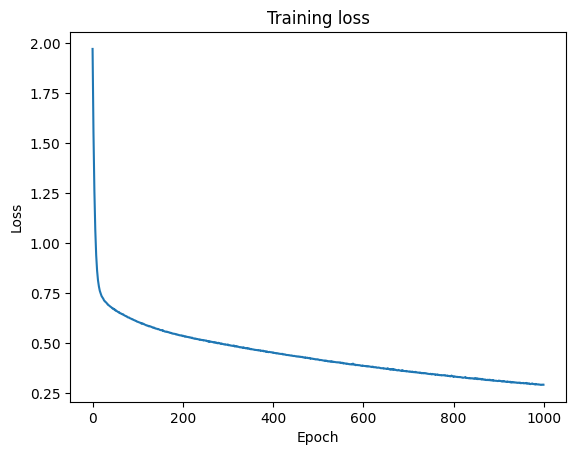

In [13]:
# Re-run the model with 1000 epochs
model = initialize_model()
history_long = model.fit(X_train, y_train, epochs=1000, verbose=1)

# Plot the loss history for 1000 epochs
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Training loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_history(history_long)


❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [14]:
# Re-evaluate the model after 1000 epochs
loss_long, accuracy_long = model.evaluate(X_test, y_test)
print(f"Test accuracy after 1000 epochs: {accuracy_long}")


12/12 [==============================] - 0s 1ms/step - loss: 1.8144 - accuracy: 0.6000
Test accuracy after 1000 epochs: 0.6000000238418579


* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

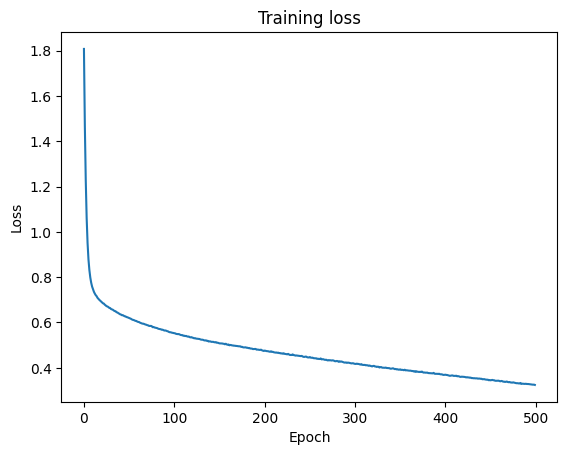

In [15]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [16]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

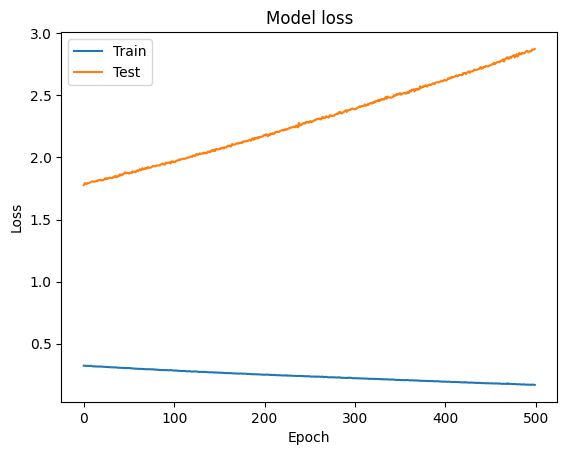

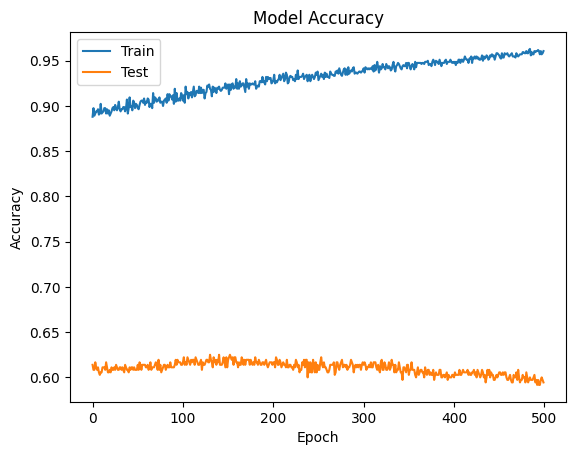

In [17]:
# Use this function after training the model with validation data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=16, verbose=0)
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!